# Exploring Decision Boundaries with Pokemon Classification

This repository explores various machine learning classification methods using a Pokémon dataset, with the goal of classifying Pokémon as legendary or non-legendary. The focus is on visually understanding the decision boundaries of each algorithm, rather than on training or evaluating a high-performance predictive model.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid", {"axes.grid": False})
import sklearn as sk
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from matplotlib.colors import ListedColormap

## Read the data and do some EDA

In [2]:
# Read in the data as a Pandas frame
f = pd.read_csv("pokemon.csv")
f.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# Use attack and defense as X and Y variables
X = np.array(f.attack.values)
Y = np.array(f.defense.values)
Z = np.array(f.is_legendary.values)

Count the number of legendary and non-legendary Pokémon. There are many more of the latter, so we need to do something about that. Here we take the approach of randomly subsampling the non-legendary class.

In [4]:
i00 = np.ravel(np.argwhere(Z == 0))
i1 = np.ravel(np.argwhere(Z == 1))

In [5]:
len(i00)

731

In [6]:
len(i1)

70

In [7]:
# Deal with imbalance through undersampling non-legendary Pokemon
np.random.seed(13)
i0 = np.random.choice(i00, size=len(i1), replace=False)

In [8]:
i0

array([114, 271,  58, 305, 546, 164, 432,   4, 252,  44, 298, 663, 737,
       651, 274, 688, 334, 346, 508, 140, 161, 683,  21, 712,  51, 469,
       447, 704,  85, 770, 190, 238, 722, 772, 442, 662,   0,  37, 613,
       194, 294,  94, 219,  10, 213, 516, 333, 434, 533, 474,  65, 127,
       262, 412, 409, 766, 220, 593, 460, 275, 173, 357, 418, 578, 340,
       437, 257, 351, 449, 684])

In [9]:
f.iloc[i0]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
114,"['Early Bird', 'Scrappy', 'Inner Focus']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.00,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,125,5120,70,590,45,Parent Pokémon,100,1000000,2.2,105,Garuraガルーラ,Kangaskhan,0.0,115,60,100,100,normal,NaN,80.0,1,0
271,"['Swift Swim', 'Rain Dish', 'Own Tempo']",2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.5,1.0,1.00,2.0,1.0,1.0,0.5,0.25,70,3840,70,480,45,Carefree Pokémon,70,1059860,1.5,80,Runpappaルンパッパ,Ludicolo,50.0,272,90,100,70,water,grass,55.0,3,0
58,"['Intimidate', 'Flash Fire', 'Justified']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.00,1.0,0.5,2.0,0.5,1.00,1.0,1.0,2.0,0.5,2.00,110,5120,70,555,75,Legendary Pokémon,80,1250000,1.9,90,Windieウインディ,Arcanine,75.4,59,100,80,95,fire,NaN,155.0,1,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,1.0,4.0,0.5,0.25,0.0,0.5,0.5,1.0,2.00,140,8960,35,630,45,Iron Armor Pokémon,230,1250000,2.1,70,Bossgodoraボスゴドラ,Aggron,50.0,306,60,80,50,steel,rock,360.0,3,0
546,"['Prankster', 'Infiltrator', 'Chlorophyll']",1.0,0.5,0.0,0.5,1.0,0.5,2.0,2.00,1.0,0.5,0.5,2.0,1.00,4.0,1.0,1.0,2.0,0.50,67,5120,70,480,75,Windveiled Pokémon,85,1000000,0.7,60,Elfuunエルフーン,Whimsicott,50.0,547,77,75,116,grass,fairy,6.6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,"['Sturdy', 'Rock Head', 'Rattled']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,2.0,2.0,1.0,0.50,0.5,1.0,1.0,2.0,2.00,80,5120,70,290,255,Bonsai Pokémon,95,1000000,0.5,50,Usohachiウソハチ,Bonsly,50.0,438,10,45,10,rock,NaN,15.0,4,0
257,"['Torrent', 'Damp']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,2.0,1.0,0.5,1.00,1.0,1.0,1.0,0.5,0.50,70,5120,70,310,45,Mud Fish Pokémon,50,1059860,0.4,50,Mizugorouミズゴロウ,Mudkip,88.1,258,50,50,40,water,NaN,7.6,3,0
351,"['Color Change', 'Protean']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.00,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,90,5120,70,440,200,Color Swap Pokémon,70,1059860,1.0,60,Kakureonカクレオン,Kecleon,50.0,352,60,120,40,normal,NaN,22.0,3,0
449,"['Sand Stream', 'Sand Force']",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,2.0,1.00,0.5,1.0,0.5,1.0,2.00,112,7680,70,525,60,Heavyweight Pokémon,118,1250000,2.0,108,Kabaldonカバルドン,Hippowdon,50.0,450,68,72,47,ground,NaN,300.0,4,0


In [10]:
np.linspace(1.6,9.6,9)

array([1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6, 9.6])

#### Make a plot showing the distribution of the two classes

In [11]:
amin = 0
amax = 250
dmin = 0
dmax = 250
h = 1

# Make a grid of (x, y) points. We'll need them to make maps of the classification
xg, yg = np.meshgrid(np.arange(amin, amax, h), np.arange(dmin, dmax, h))

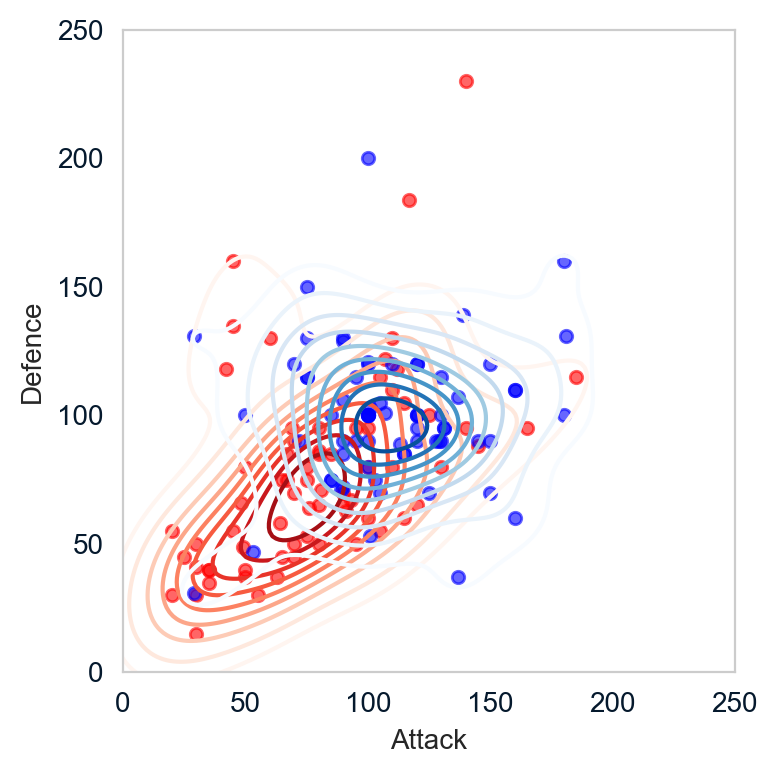

In [12]:
# Make a plot as part of EDA
plt.figure(figsize=(4, 4))
plt.scatter(X[i0], y=Y[i0], marker="o", c=[[1, 0, 0]], s=20, alpha=0.6)
# It must have also changed the way the contours are generated, so the plot looks slightly different from the one in the slides.
sns.kdeplot(f.iloc[i0],x='attack',y='defense',cmap="Reds",n_levels=10,thresh=0.1) 
# Alternatively, specify levels, e.g. levels = np.linspace(.15,.95,9)
plt.scatter(X[i1], y=Y[i1], marker="o", c=[[0, 0, 1]], s=20, alpha=0.6)
sns.kdeplot(f.iloc[i1],x='attack',y='defense',cmap="Blues",n_levels=10,thresh=0.1)
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.xlim((amin, amax))
plt.ylim((dmin, dmax))
plt.tight_layout()
plt.show()

## Testing classifiers

In the next few cells we use Scikit-learn to fit various classifiers and draw plots to assess their performance.

#### Support Vector classifier (SVM without kernel trick)

In [13]:
svc = sk.svm.SVC(kernel="linear", C=0.025)

In [14]:
ii = np.concatenate((i0, i1))

In [15]:
xx = np.array((X[ii], Y[ii])).T
yy = Z[ii]

In [16]:
svc.fit(xx, yy)

SVC(C=0.025, kernel='linear')

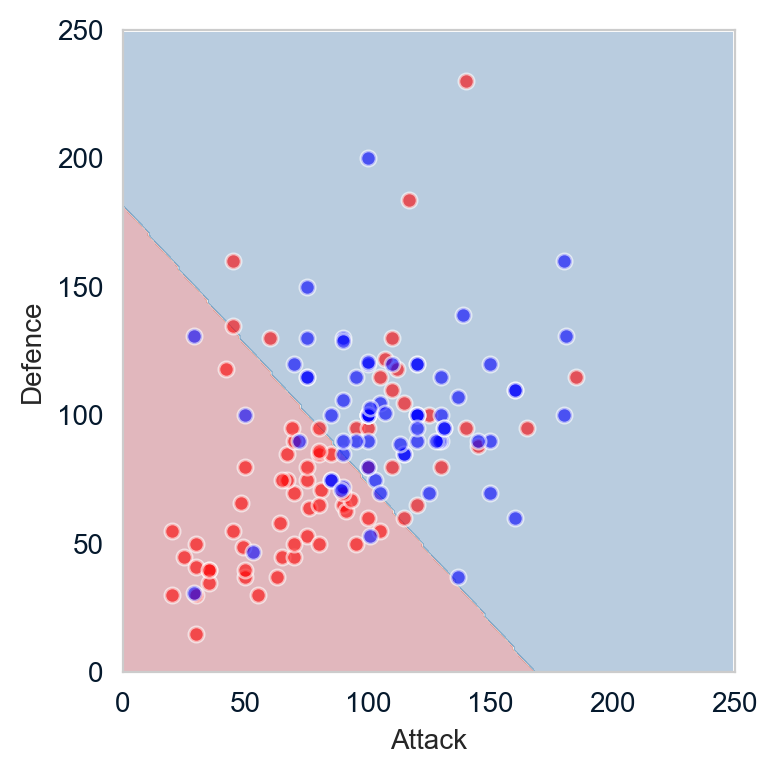

In [17]:
# Predict the class for each point in the grid
zz = svc.predict(np.c_[xg.ravel(), yg.ravel()])
# Reshape the predictions to match the grid shape
zz = zz.reshape(xg.shape)

# Create a new figure with a specified size
plt.figure(figsize=(4, 4))

# Plot the decision boundary using a filled contour plot
plt.contourf(xg, yg, zz, cmap=plt.cm.RdBu, alpha=0.3)

# Scatter plot for the first class points
plt.scatter(
    X[i0], Y[i0], marker="o", c=[[1, 0, 0]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)

# Scatter plot for the second class points
plt.scatter(
    X[i1], Y[i1], marker="o", c=[[0, 0, 1]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)

# Set the x-axis and y-axis labels
plt.xlabel("Attack")
plt.ylabel("Defence")

# Set the limits for the y-axis and x-axis
plt.ylim((dmin, dmax))
plt.xlim((amin, amax))

# Adjust the layout to make it tight
plt.tight_layout()

# Display the plot
plt.show()

#### Quadratic discriminant

In [18]:
qda = sk.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(xx, yy)

QuadraticDiscriminantAnalysis()

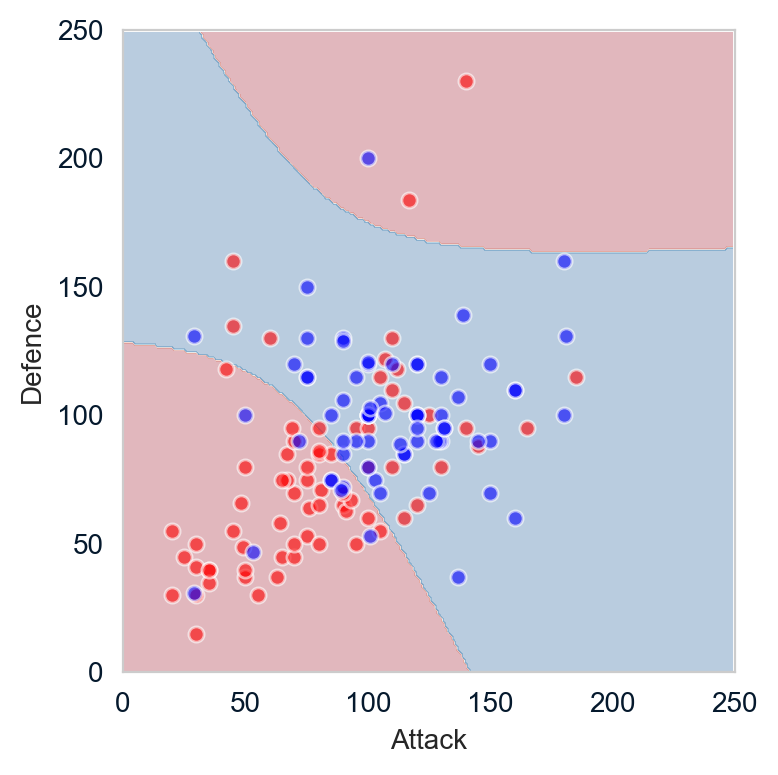

In [19]:
zz4 = qda.predict(np.c_[xg.ravel(), yg.ravel()])
zz4 = zz4.reshape(xg.shape)
plt.figure(figsize=(4, 4))
plt.contourf(xg, yg, zz4, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(
    X[i0], Y[i0], marker="o", c=[[1, 0, 0]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.scatter(
    X[i1], Y[i1], marker="o", c=[[0, 0, 1]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.xlim((amin, amax))
plt.ylim((dmin, dmax))
plt.tight_layout()
plt.show()
# plt.savefig("Figures/poke5.pdf", format="pdf")

#### k-Nearest Neighbours

In [20]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xx, yy)

KNeighborsClassifier()

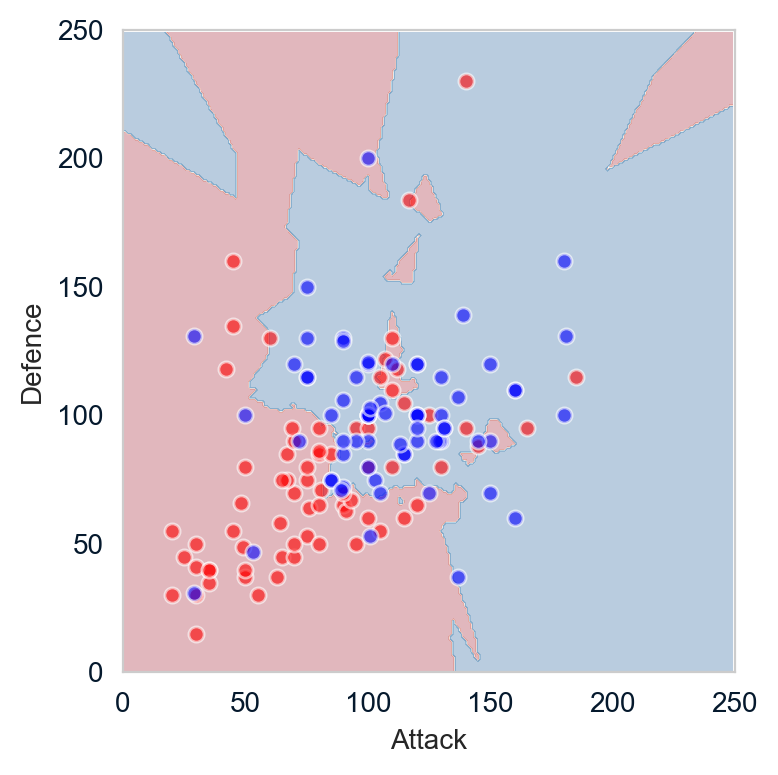

In [21]:
zz2 = knn.predict(np.c_[xg.ravel(), yg.ravel()])
zz2 = zz2.reshape(xg.shape)
plt.figure(figsize=(4, 4))
plt.contourf(xg, yg, zz2, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(
    X[i0], Y[i0], marker="o", c=[[1, 0, 0]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.scatter(
    X[i1], Y[i1], marker="o", c=[[0, 0, 1]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.xlim((amin, amax))
plt.ylim((dmin, dmax))
plt.tight_layout()
plt.show()
# plt.savefig("Figures/poke3.pdf", format="pdf")

#### Random forest

In [22]:
tr = sk.tree.DecisionTreeClassifier()
tr.fit(xx, yy)

DecisionTreeClassifier()

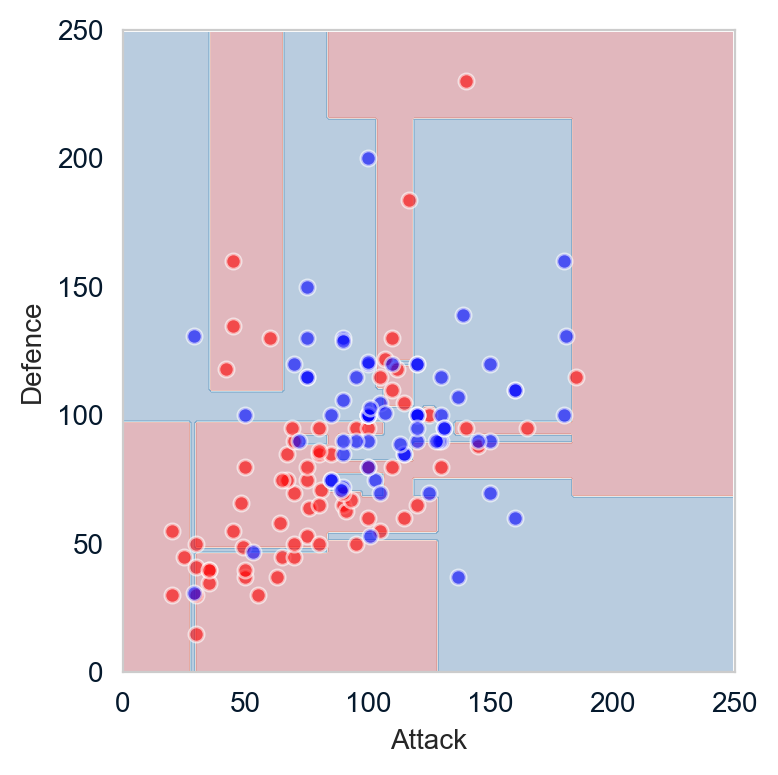

In [23]:
zz3 = tr.predict(np.c_[xg.ravel(), yg.ravel()])
zz3 = zz3.reshape(xg.shape)
plt.figure(figsize=(4, 4))
plt.contourf(xg, yg, zz3, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(
    X[i0], Y[i0], marker="o", c=[[1, 0, 0]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.scatter(
    X[i1], Y[i1], marker="o", c=[[0, 0, 1]], s=30, alpha=0.6, edgecolor=[[1, 1, 1]]
)
plt.xlabel("Attack")
plt.ylabel("Defence")
plt.xlim((amin, amax))
plt.ylim((dmin, dmax))
plt.tight_layout()
plt.show()